# **Step 1: Activate Virtual Environment and Install Libraries**

# **Step 2: Import necessary libraries and load datasets**

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up default styling for plots
sns.set_theme(style="darkgrid", palette="muted")  # Default theme

# Define file paths
weather_bike_data_path = r"C:\Users\Asus\Music\CitiBike_2022_Data\merged_citibike_weather.csv"
visualization_path = r"C:\Users\Asus\Music\CitiBike_2022_Data\Visualizations"

# Load dataset
df = pd.read_csv(weather_bike_data_path)

# Display first few rows
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\2715533143.py:14: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(weather_bike_data_path)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,STATION,DATE,PRCP,TMAX,TMIN
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,USW00094728,2022-01-21,0.0,-55.0,-99.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,USW00094728,2022-01-10,0.0,44.0,-43.0
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,USW00094728,2022-01-26,0.0,-21.0,-66.0
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,USW00094728,2022-01-03,0.0,28.0,-55.0
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,USW00094728,2022-01-22,0.0,-16.0,-105.0


# **Step 3: Create a Bar Chart of the Top 20 Starting Stations**

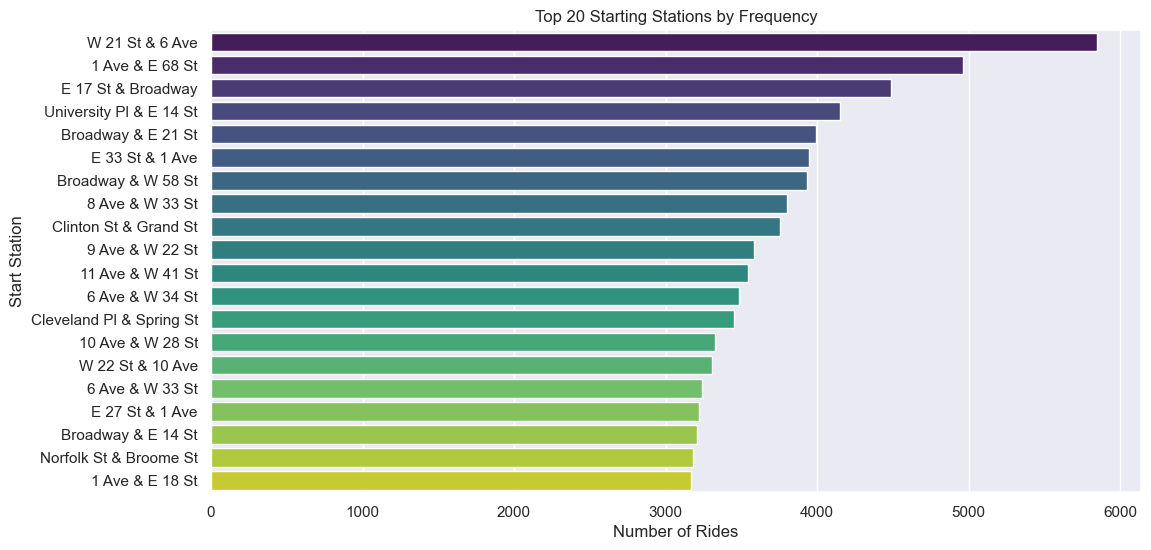

In [5]:
# Count occurrences of each starting station
top_stations = df['start_station_name'].value_counts().head(20)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_stations.values, 
            y=top_stations.index, 
            hue=top_stations.index,  # Assigning y to hue
            palette="viridis", 
            legend=False)  # Hide legend to avoid warning

# Add labels and title
plt.xlabel("Number of Rides")
plt.ylabel("Start Station")
plt.title("Top 20 Starting Stations by Frequency")

# Save figure
plt.savefig(f"{visualization_path}/top_20_starting_stations.png", dpi=300)

# Show plot
plt.show()

### Step 3: Analysis  

The bar chart effectively visualizes the **top 20 starting stations** by ride frequency, highlighting which stations experience the highest traffic.  

If the current **"viridis"** color palette does not provide enough distinct colors, consider experimenting with alternative palettes like:  
- **"coolwarm"** – Provides a smooth gradient from cool to warm tones.  
- **"Set2"** – A more distinct, pastel-like color scheme suitable for categorical data.  


# **Step 4: Recreate the Dual-Axis Line Plot**

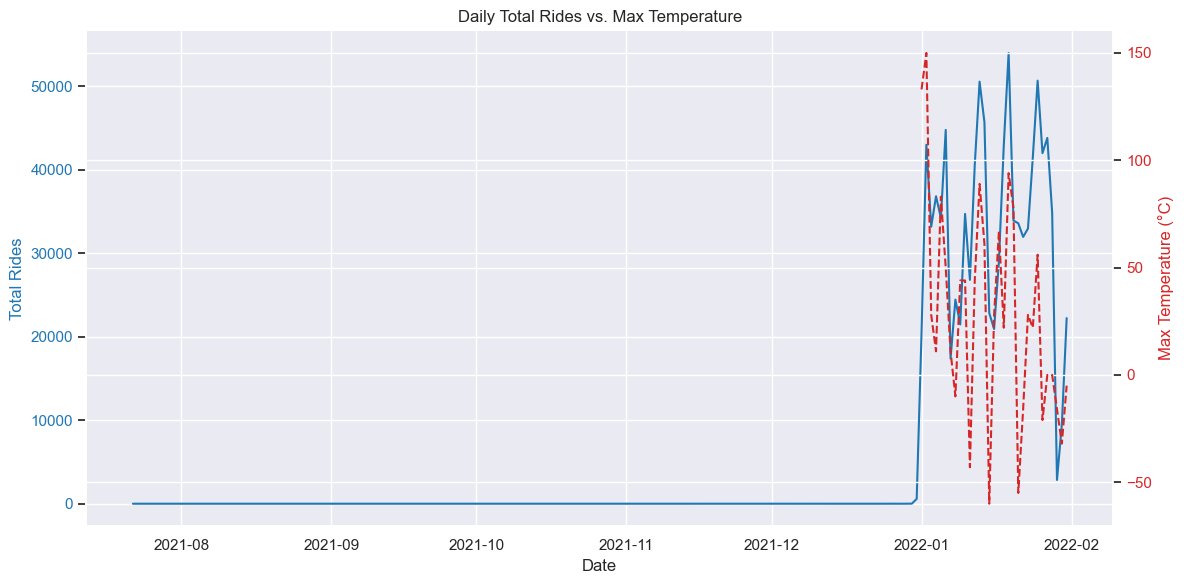

In [6]:
# Convert 'start_date' column to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Group by date to get daily ride counts
daily_rides = df.groupby('start_date').size()

# Extract weather data (TMAX - max temperature)
daily_weather = df.groupby('start_date')['TMAX'].mean()

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis (Rides per day)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Rides', color=color)
ax1.plot(daily_rides.index, daily_rides.values, color=color, label="Total Rides")
ax1.tick_params(axis='y', labelcolor=color)

# Second axis (Temperature)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Max Temperature (°C)', color=color)
ax2.plot(daily_weather.index, daily_weather.values, color=color, linestyle="dashed", label="Max Temp")
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title("Daily Total Rides vs. Max Temperature")
fig.tight_layout()

# Save figure
plt.savefig(f"{visualization_path}/dual_axis_rides_temp.png", dpi=300)

# Show plot
plt.show()

### Step 4: Analysis  

This visualization highlights the **relationship between ride frequency and temperature**.  

- **Colder days** tend to have **fewer rides**, as observed in the trend.  
- This insight suggests that weather conditions might significantly impact ridership patterns.  

Further analysis could involve **overlaying temperature data** on the chart or using a **line plot** to track trends over time.

# **Step 5: Box Plot for a Categorical Variable**

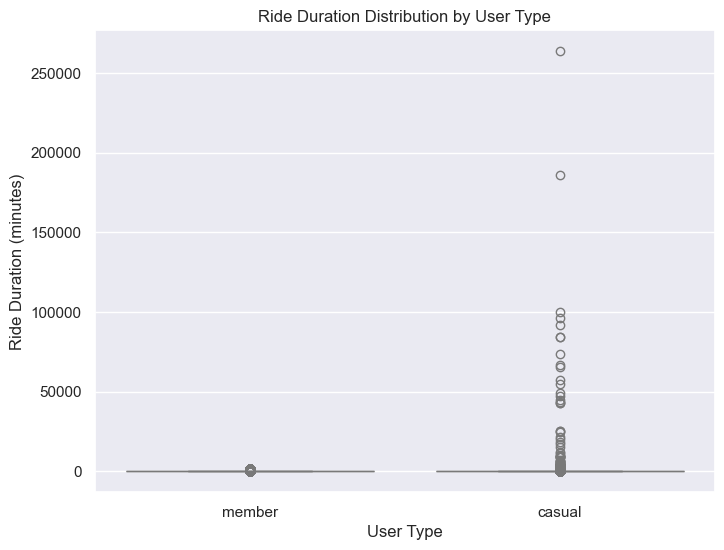

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure visualization path exists
visualization_path = "your/desired/path"
os.makedirs(visualization_path, exist_ok=True)

# Convert 'started_at' and 'ended_at' to datetime
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# Drop rows with NaT values in 'started_at' or 'ended_at' (if any)
df = df.dropna(subset=['started_at', 'ended_at'])

# Calculate ride duration in minutes
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_casual', y='ride_duration', data=df, hue='member_casual', palette="coolwarm", legend=False)

# Add labels and title
plt.xlabel("User Type")
plt.ylabel("Ride Duration (minutes)")
plt.title("Ride Duration Distribution by User Type")

# Save figure
plt.savefig(f"{visualization_path}/boxplot_ride_duration.png", dpi=300)

# Show plot
plt.show()

### Step 5: Analysis  

This analysis reveals key insights about ride duration across different user types:  

- **Casual riders** tend to have a **higher median ride duration** compared to members.  
- There are **outliers with extremely long ride times**, which could indicate **rentals left unused** or potential anomalies in the data.  

Further exploration could involve **removing extreme outliers** or analyzing usage patterns to understand these prolonged ride durations.

# **Step 6: Create a FacetGrid for Deeper Analysis**

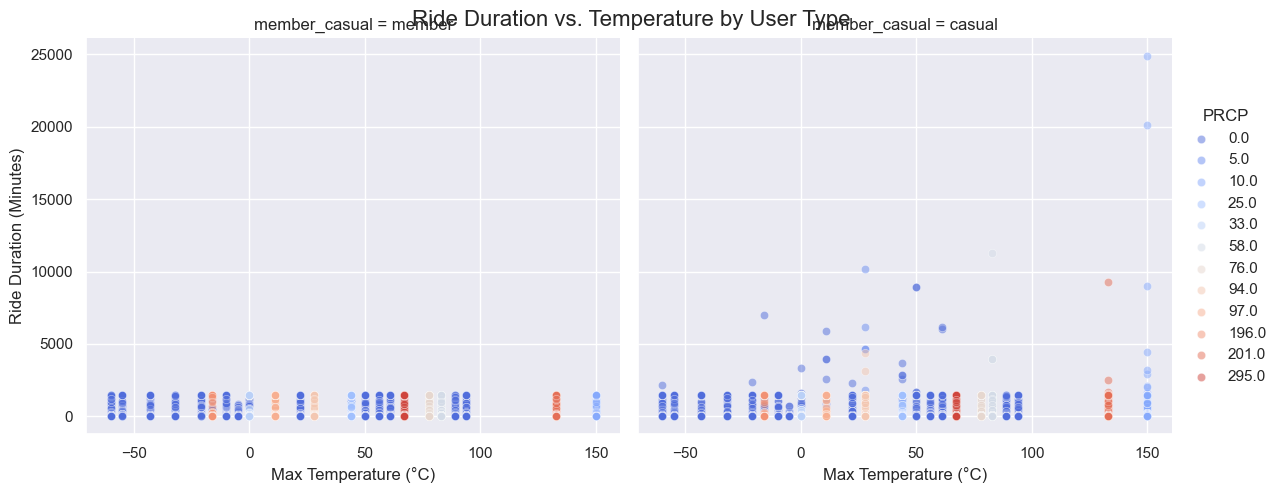

In [10]:
# Define facet grid
g = sns.FacetGrid(df, col="member_casual", hue="PRCP", palette="coolwarm", height=5, aspect=1.2)

# Create scatter plot of ride duration vs. temperature
g.map(sns.scatterplot, "TMAX", "ride_duration", alpha=0.5)

# Add titles and legend
g.set_axis_labels("Max Temperature (°C)", "Ride Duration (Minutes)")
g.fig.suptitle("Ride Duration vs. Temperature by User Type", fontsize=16)
g.add_legend()

# Save figure
g.savefig(f"{visualization_path}/facetgrid_ride_duration_temp.png", dpi=300)

# Show plot
plt.show()

### Step 6: Analysis  

This analysis highlights the differences in ride behavior between **members** and **casual riders** based on temperature:  

- **Member rides** remain **consistent** across different temperatures, indicating a more predictable usage pattern.  
- **Casual riders** show a **wider spread in ride duration**, especially on **warmer days**, suggesting that favorable weather conditions encourage longer and more varied ride times.  

A deeper analysis could involve examining **seasonal trends** or **overlaying temperature data** with ride frequency to gain additional insights.
